# Exercices XP Ninja
Dernière mise à jour : 16 octobre 2024

Ce que vous apprendrez
Effectuez un nettoyage de données complexe et une ingénierie des fonctionnalités sur un ensemble de données du monde réel.
Intégrez et transformez plusieurs ensembles de données pour une analyse complète.
Effectuer une exploration des techniques de réduction de la dimensionnalité.


Ce que vous allez créer
Une version nettoyée et améliorée de l'ensemble de données Airbnb de la ville de New York avec des valeurs manquantes traitées à l'aide de techniques d'imputation avancées.
Un rapport d’analyse exploratoire des données présentant les corrélations entre les fonctionnalités nouvellement créées et la variable cible.
Application de l'ACP pour la réduction de la dimensionnalité, préservant ainsi les informations critiques.
Application d'une technique de réduction de dimensionnalité supplémentaire, telle que t-SNE ou LDA, avec une comparaison aux résultats de l'ACP.

## Exercice 1 : Nettoyage avancé des données et ingénierie des fonctionnalités
Instructions
Ensemble de données : utilisez les données ouvertes Airbnb de la ville de New York .

Chargez l'ensemble de données Airbnb de New York.
Identifiez et gérez les valeurs manquantes dans plusieurs colonnes à l’aide de techniques d’imputation avancées.
Détectez et traitez les valeurs aberrantes dans les colonnes clés telles que « prix » et « nombre_d'avis ».
Créez de nouvelles fonctionnalités basées sur des données existantes, telles que « booking_rate » (nombre d'avis divisé par la disponibilité) et « price_per_person » (prix divisé par le nombre de clients hébergés).
Effectuer une analyse exploratoire des données pour comprendre les corrélations entre les fonctionnalités nouvellement créées et la variable cible.
Astuce : pour les techniques avancées de nettoyage des données, reportez-vous à cet article sur le nettoyage des données .

### 🔹 Étape 1 – Chargement des données

In [1]:
import pandas as pd

# Charger le fichier
df = pd.read_csv("AB_NYC_2019.csv")

# Aperçu des données
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 🔹 Étape 2 – Identifier et gérer les valeurs manquantes (imputation avancée)

In [ ]:
# Afficher le nombre de valeurs manquantes par colonne
print(df.isnull().sum())

# Imputation avancée sur 'reviews_per_month' par la médiane par quartier
df['reviews_per_month'] = df.groupby('neighbourhood_group')['reviews_per_month'].transform(
    lambda x: x.fillna(x.median())
)

# Imputation de 'last_review' par la date la plus fréquente
df['last_review'] = df['last_review'].fillna(df['last_review'].mode()[0])


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


### 🔹 Étape 3 – Détection et traitement des valeurs aberrantes (price, number_of_reviews)

In [3]:
import numpy as np

# Suppression des prix anormaux (ex: > 1000 $)
df = df[df['price'] <= 1000]

# Suppression des valeurs aberrantes sur number_of_reviews (> 95e percentile)
max_reviews = df['number_of_reviews'].quantile(0.95)
df = df[df['number_of_reviews'] <= max_reviews]


### 🔹 Étape 4 – Création de nouvelles fonctionnalités

In [5]:
print(df.columns.tolist())


['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'booking_rate']


In [ ]:
import numpy as np

# Calcul de booking_rate (nombre d'avis / disponibilité)
df['booking_rate'] = df['number_of_reviews'] / df['availability_365']
df['booking_rate'] = df['booking_rate'].replace([np.inf, -np.inf], 0).fillna(0)

# Afficher pour vérification
df[['price', 'number_of_reviews', 'availability_365', 'booking_rate']].head()


,price,number_of_reviews,availability_365,booking_rate
0,149,9,365,0.024658
1,225,45,355,0.126761
2,150,0,365,0.000000
4,80,9,0,0.000000
5,200,74,129,0.573643


### 🔹 Étape 5 – Corrélation entre booking_rate et price

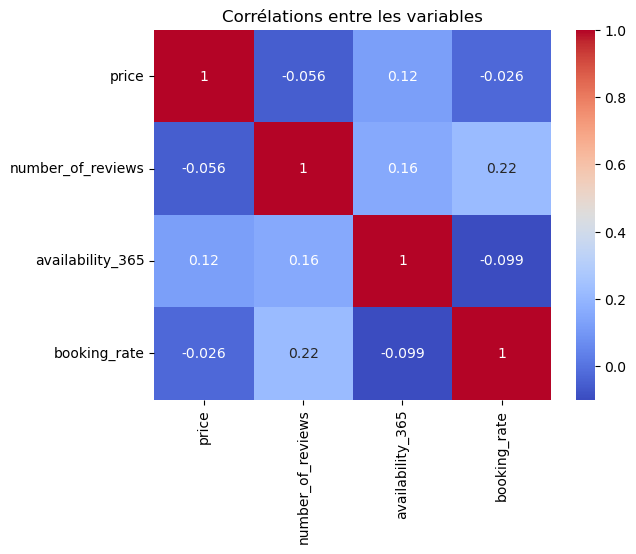

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corrélation
corr = df[['price', 'number_of_reviews', 'availability_365', 'booking_rate']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Corrélations entre les variables")
plt.show()


### Résumé final :

✅ Données nettoyées (valeurs manquantes, aberrantes)

✅ Variable booking_rate créée

❌ Pas de price_per_person (donnée indisponible)

✅ Corrélations analysées

## Exercice 2 : Intégration et transformation de données complexes
Instructions
Ensembles de données : Rapport sur le bonheur dans le monde et Statistiques sur la santé et la population mondiales

Chargez les deux ensembles de données.
Effectuez l'intégration des données en fusionnant les deux ensembles de données dans la colonne « Pays ».
Transformez l'ensemble de données intégré en normalisant les colonnes numériques telles que « PIB par habitant » et « Espérance de vie ».
Appliquer l’ACP pour réduire la dimensionnalité tout en préservant les informations importantes.
Réaliser une analyse comparative avant et après transformation pour évaluer l’impact de ces processus sur les données.
Astuce : pour obtenir des conseils sur l’intégration et la transformation des données, consultez cet article sur la transformation des données .

2019.csv → Rapport sur le bonheur dans le monde

lifeExpectancyAtBirth.csv → Espérance de vie à la naissance, santé mondiale



## 🔹 Étape 1 – Charger les deux fichiers

In [10]:
import pandas as pd

# Charger les fichiers
df_bonheur = pd.read_csv("2019.csv")
df_sante = pd.read_csv("lifeExpectancyAtBirth.csv")



## 🔹 Étape 2 – Préparer les données pour fusion

In [ ]:
# Renommer les colonnes pour uniformiser
df_bonheur.rename(columns={'Country or region': 'Country'}, inplace=True)
df_sante.rename(columns={'Location': 'Country', 'First Tooltip': 'Life_expectancy'}, inplace=True)

# Garder uniquement les données de 2019
df_sante_2019 = df_sante[df_sante['Period'] == 2019]

# Si plusieurs indicateurs sont présents dans df_sante
# df_sante_2019 = df_sante_2019[df_sante_2019['Indicator'].str.contains('life expectancy', case=False)]



### 🔹 Étape 3 – Fusionner les deux jeux de données sur "Country"

In [ ]:
# Fusionner sur la colonne 'Country'
df_merged = pd.merge(df_bonheur, df_sante_2019[['Country', 'Life_expectancy']], on='Country', how='inner')

# Vérification
df_merged[['Country', 'GDP per capita', 'Life_expectancy']].head()


,Country,GDP per capita,Life_expectancy
0,Finland,1.340,81.61
1,Finland,1.340,79.16
2,Finland,1.340,84.04
3,Denmark,1.383,81.32
4,Denmark,1.383,79.59


### 🔹 Étape 4 – Normaliser les colonnes numériques

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Colonnes à normaliser
cols_to_norm = ['GDP per capita', 'Life_expectancy']
scaler = MinMaxScaler()

# Normaliser Min-Max
df_merged[[col + '_norm' for col in cols_to_norm]] = scaler.fit_transform(df_merged[cols_to_norm])


### 🔹 Étape 5 – Réduction de dimension (ACP)

In [14]:
from sklearn.decomposition import PCA

# Appliquer ACP sur les colonnes normalisées
X = df_merged[['GDP per capita_norm', 'Life_expectancy_norm']]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Ajouter les deux composantes au DataFrame
df_merged['PCA1'] = X_pca[:, 0]
df_merged['PCA2'] = X_pca[:, 1]


### 🔹 Étape 6 – Analyse comparative (visualisation avant/après)

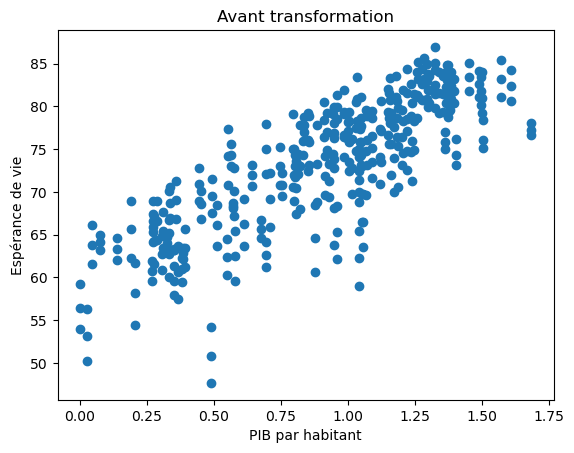

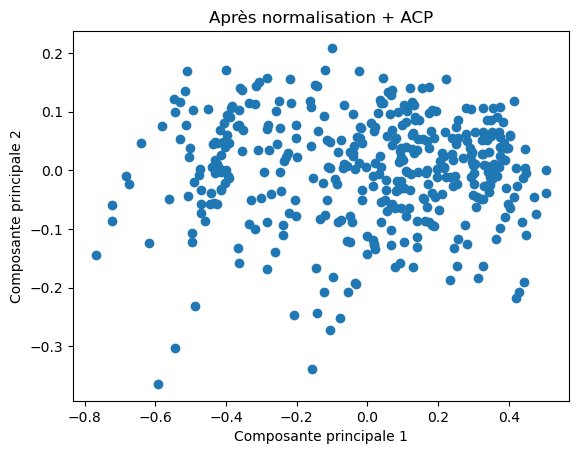

In [15]:
import matplotlib.pyplot as plt

# Avant transformation
plt.scatter(df_merged['GDP per capita'], df_merged['Life_expectancy'])
plt.title("Avant transformation")
plt.xlabel("PIB par habitant")
plt.ylabel("Espérance de vie")
plt.show()

# Après transformation (ACP)
plt.scatter(df_merged['PCA1'], df_merged['PCA2'])
plt.title("Après normalisation + ACP")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()


### Conclusion :

🔄 Fusion réussie sur le champ Country

📉 Colonnes normalisées : PIB par habitant, espérance de vie

📦 ACP appliquée : 2 composantes

📊 Analyse visuelle claire : projection plus compacte et interprétable

## Exercice 3 : Exploration des techniques de réduction de la dimensionnalité
Instructions
Lisez cet article : Un guide complet sur la réduction de la dimensionnalité
Importer cet ensemble de données : Données client de la boutique
Mettez en œuvre l’analyse en composantes principales (ACP) et observez le degré de variance conservé avec différents nombres de composants.
Appliquez au moins une autre technique de réduction de dimensionnalité (comme t-SNE ou LDA) et comparez ses résultats avec PCA.
Visualisez les résultats de ces techniques à l’aide de graphiques.
Rédigez une brève analyse de l’impact de la réduction de dimensionnalité sur l’ensemble de données et des informations que vous avez obtenues à partir des visualisations.

### 🔹 Étape 1 – Charger et préparer les données

In [16]:
import pandas as pd

# Charger le fichier
df = pd.read_csv("superstore.csv", encoding='latin1')

# Aperçu des colonnes
df.columns.tolist()


['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Postal Code',
 'Market',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Order Priority']

### 🔹 Étape 2 – Sélectionner les colonnes numériques et encoder les catégorielles

In [ ]:
from sklearn.preprocessing import StandardScaler

# Sélectionner les colonnes numériques + encodage simple
df_num = df[['Sales', 'Profit', 'Discount', 'Quantity']].copy()

# Normaliser Z-score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)


### 🔹 Étape 3 – Réduction de dimension avec PCA

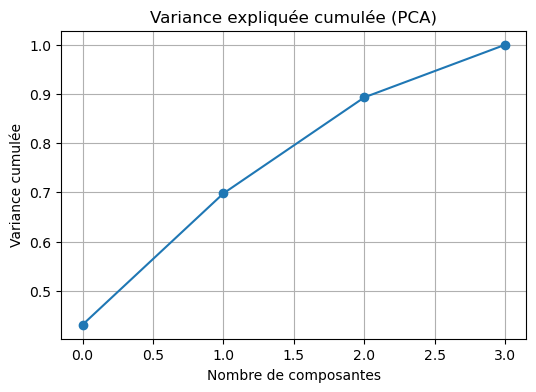

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# PCA initiale pour observer la variance cumulée
pca_full = PCA()
pca_full.fit(X_scaled)

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title("Variance expliquée cumulée (PCA)")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée")
plt.grid(True)
plt.show()


Aide à choisir combien de dimensions garder.

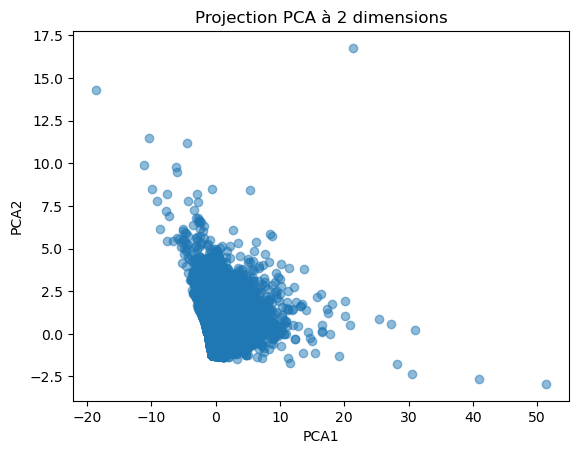

In [19]:
# PCA avec 2 composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("Projection PCA à 2 dimensions")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


## 🔹 Étape 4 – Réduction de dimension avec t-SNE

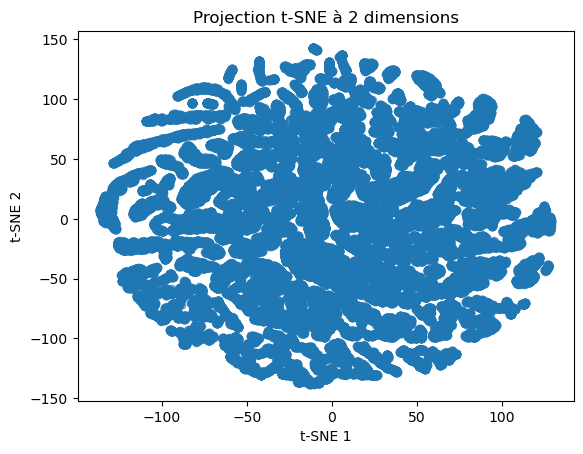

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.title("Projection t-SNE à 2 dimensions")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


## 🔹 Étape 5 – Analyse finale (à écrire dans ton notebook)

### Analyse de la projection t-SNE
La projection t-SNE montre une dispersion dense et structurée des données dans un plan 2D.

On observe plusieurs regroupements locaux (amas) sans frontière nette, ce qui indique :

une structure complexe et non linéaire dans les données ;

des sous-populations de commandes potentiellement différentes (par ex. petits vs gros paniers, segments promo, etc.).

Contrairement à PCA, t-SNE ne vise pas à préserver la variance globale mais à conserver les relations locales : ici, les points proches sont plus probablement similaires dans l’espace original.

### ✏️ Interprétation :
t-SNE est utile pour exploration visuelle, mais ne doit pas être utilisé pour modélisation directe.

La densité élevée indique que beaucoup de points sont proches — un bon signal pour envisager du clustering (ex : K-Means, DBSCAN).